In [1]:
! pip install --upgrade "kaleido==0.1.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 8.7 MB/s eta 0:00:00


In [2]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Loading and Data Exploration

---------

## Load Data

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle.

In [3]:
# Import dataset
dfcar = pd.read_csv('https://drive.google.com/uc?id=1KfTnuIeppn-b5bdMyIvVVbII_P7m1Tnu', on_bad_lines="skip")
dfcar.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [4]:
# dfcar = pd.read_csv('car_prices.csv', on_bad_lines= 'skip')

**Berikut adalah daftar fitur yang terdapat pada dataset:**

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe body dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. **MMR : Manheim Market Report, indikator harga wholesale mobil bekas yang dibuat oleh Manheim (salah satu perusahaan lelang mobil bekas terbesar di dunia).**
15. Sellingprice : Harga jual mobil.
16. Saledate : Tanggal mobil dijual.

## Data Exploration

In [5]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


1. Total dari data ada 558,811 entries.
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya. Namun, untuk kolom `saledate` tipe data yang awalnya 'object', dirasa perlu diubah ke datetime.
3. Terdapat nilai Null pada beberapa fitur.

In [6]:
# Mengecek null value
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat 9 fitur yang memiliki Null value, yaitu `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`. Perlu diadakan tindak lanjut di Data Cleaning

In [7]:
# Mengecek duplicated rows
dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [8]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


1. `condition` memiliki value antara 1-5.
2. Nilai dari `odometer` terlihat memiliki jarak yang jauh antara min dan max dimana nilai min nya adalah 1 dan max nya hampir 1 juta. Tentu ini adalah hal yang terkesan janggal. Selain itu, nilai mean dan median nya juga terhitung sangat jauh yaitu 16,000.
3. Secara keseluruhan, nilai `mmr` dan `sellingprice` tidak terlalu berbeda. Namun, nilai min-max dan mean-median nya sangat jauh, sehingga perlu diperhatikan lebih lanjut untuk tahap berikutnya.
4. Beberapa kolom di fitur numerical juga terdapat null value, sehingga perlu ditangani pada tahap berikutnya.

In [9]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


1. Dari data diatas, kita bisa melihat secara sekilas nilai apa yang paling teratas, sering muncul, dan berapa jumlah unique value dari masing-masing fitur.
2. Sebagai contoh, Ford merupakan `make` yang paling populer diantara 96 total brand lain. Selain itu, `body` sedan juga termasuk yang paling favorit.
3. `transmission` automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%.
4. Warna hitam mendominasi baik untuk warna eksterior maupun interior.

----------

# EDA (Exploratory Data Analysis)

-------

Pada tahap ini, kita akan menganalisis baik analisis univariate ataupun multivariate.

## UNIVARIATE ANALYSIS

### Unique Value From Some Features

In [10]:
# Mengecek unique value 'year'
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

Semua value sudah sesuai, yaitu berupa angka yang dimulai dari tahun 1982 hingga 2015.

In [11]:
# Mengecek unique value 'make'
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

Terdapat null value pada fitur `make`. Selain itu, value dari kolom `make` masih terlalu beragam dimana terdapat kata yang huruf awal kapital, kata yang berisi kapital semua, kata yang berisi lower case semua. Oleh karena itu, kita akan mengubah value nya menjadi lowercase semua di tahap berikutnya. Hal yang sama mungkin saja juga terjadi pada fitur tipe object lainnya.

In [12]:
# Mengecek unique value 'trim'
dfcar['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

Fitur `trim` memiliki lebih dari 1000 values sehingga unique value yang muncul hanya beberapa.

In [13]:
# Mengecek unique value 'condition'
dfcar['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

Untuk kondisi mobil bervariasi dari 1 sampai 5, serta terdapat null value.

### Outlier Fitur Numerik (year, condition, odometer, MMR, sellingprice)

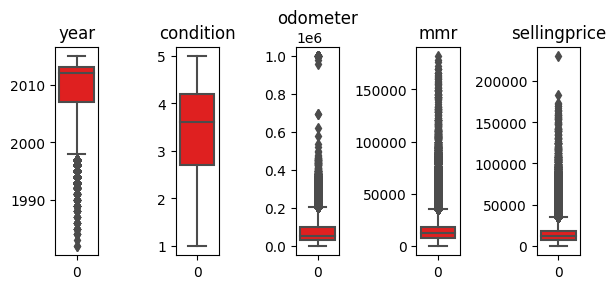

In [14]:
# Melihat penampilan outlier

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa `mmr` dan `sellingprice` memiliki outlier paling banyak, begitu juga dengan kolom `odometer` dan `year`. Untuk kuartil dan mediannya pun juga terkesan jauh. Hal ini dapat terjadi karena banyaknya data mobil (500k++) sehingga nilai mmr dan selling price mapun odometer juga sangat bervariasi. Kolom yang terlihat paling normal hanyalah kolom `condition`. Hasil analisis ini merupakan bentuk visual dari statistik data yang telah kita lakukan sebelumnya pada tahap Data Exploration.

### Distribusi Data (year, condition, odometer, MMR, sellingprice)

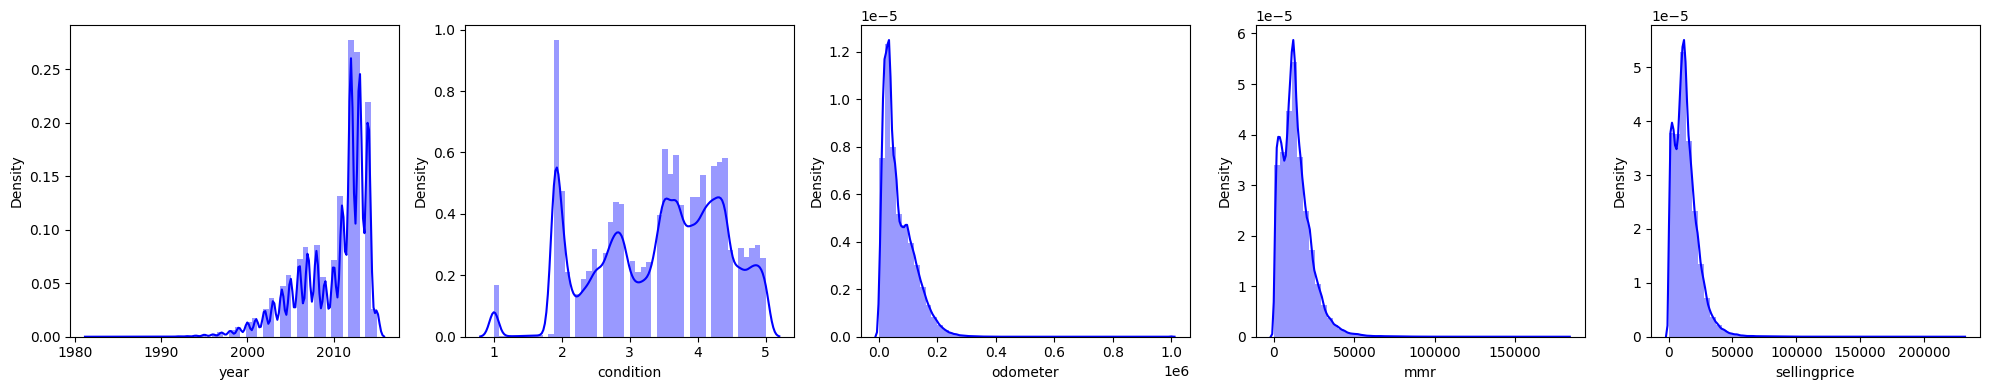

In [15]:
# Melihat grafik distribusi

plt.figure(figsize=(20, 4))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Dari kolom `year` kita bisa melihat bahwa penjualan cenderung mengalami peningkatan pada setiap tahunnya dan puncak penjualan berada di antara tahun 2010 hingga 2015. Kita juga bisa melihat bahwa kolom `year` termasuk left-skewed.
2. Pada kolom `condition`, kondisi mobil yang berada di kisaran angka 2 menjadi mayoritas dari kondisi lainnya. Hal ini menunjukkan bahwa kondisi mobil bekas bernilai kurang baik. Namun, tidak sedikit juga kondisi mobil yang bernilai 3 keatas hingga 4.
3. Untuk `odometer` dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2 yang artinya odometer berkisar antara 0 hingga 200k. Sedangkan untuk pemakaian mobil diatas 200k terhitung jarang.
4. Kolom `mmr` dan `sellingprice` terlihat serupa dimana harga jual mobil berkisar di angka 0-50000.
5. Dari kolom-kolom diatas, kolom `odometer`, `mmr`, dan `sellingprice` termasuk right-skewed.

### Check Nilai Min dan Max

Seperti analisis sebelumnya dimana kita menemukan nilai min dan max yang terkesan tidak masuk akal, maka kita akan mengecek lebih lanjut data yang mengandung nilai tersebut.  

Beberapa kolom tersebut adalah `odometer`, `mmr`, dan `sellingprice`.

**1. Nilai min dan max dari kolom Odometer**

In [16]:
# Melihat baris data dengan nilai 'odometer' = 1 (min)
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
130294,2003,Chevrolet,Tahoe,LS,SUV,automatic,1gnek13z63j215680,wa,2.000,1.000,green,beige,charitable adult rides services/car donating is,7050,550,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
409611,1997,Toyota,Camry,LE,Sedan,automatic,4t1bg22k1vu807315,il,1.000,1.000,white,gray,new york auto sales inc,1625,250,Tue Apr 21 2015 06:00:00 GMT-0700 (PDT)
116541,2007,Honda,Ridgeline,RT,Crew Cab,automatic,2hjyk162x7h505587,ca,2.000,1.000,silver,gray,"ahfc/honda lease trust/hvt, inc.",13600,6250,Tue Feb 03 2015 05:00:00 GMT-0800 (PST)


In [17]:
# Melihat baris data dengan nilai 'odometer' = 999999 (max)
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
83882,2005,Ford,Escape,XLT,SUV,automatic,1fmyu93105kc70126,ms,1.900,999999.000,gray,gray,santander consumer,850,1300,Thu Jan 08 2015 10:30:00 GMT-0800 (PST)
321728,1998,Lexus,ES 300,Base,Sedan,automatic,jt8bf28g4w5037146,ca,2.000,999999.000,gray,beige,800 loan mart,650,350,Tue Feb 17 2015 05:00:00 GMT-0800 (PST)
385721,2014,Kia,Forte,EX,Sedan,automatic,knafx4a8xe5052180,tx,1.000,999999.000,black,black,kia motors finance,11300,3100,Tue Mar 03 2015 02:30:00 GMT-0800 (PST)


Dari data min dan max kolom `odometer` diatas terlihat bahwa data tersebut tidak hanya mengandung nilai min dan max yang jauh tetapi pada kolom lain juga tidak normal. Hal tersebut bisa dilihat dari sample diatas dimana baris min dan max tersebut juga banyak mengandung null value, nilai mmr dan selling price yang rendah, dan kondisi yang tidak bagus.

**2. Nilai Min Selling Price**

In [18]:
# Melihat baris data dengan nilai 'sellingprice' = 1 (min)
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.000,NaN,white,gray,laa leasing,7850,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.100,1.000,black,black,peoples credit company inc,7325,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,4.100,31886.000,white,gray,u-haul,20800,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,va,1.000,254132.000,red,gray,automotive remarketing inc,375,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


**3. Nilai Min MMR**

In [19]:
# Melihat baris data dengan nilai 'mmr' = 25 (min)
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
25325,2003,Buick,Regal,LS,Sedan,automatic,2g4wb52kx31285987,va,2.500,258557.000,black,gray,dt inventory,25,400,Thu Dec 18 2014 08:50:00 GMT-0800 (PST)
78379,1995,chevrolet,1500,4x4 ext silver z71,NaN,automatic,2gcek19kxs1187586,md,2.000,284155.000,green,gray,purple heart services inc,25,550,Tue Jan 06 2015 04:00:00 GMT-0800 (PST)
440107,2002,Saab,9-5,Arc 3.0t,Sedan,automatic,ys3ed49z623031038,fl,2.100,171964.000,silver,black,courtesy kia of brandon,25,800,Thu May 21 2015 09:20:00 GMT-0700 (PDT)


Dari data diatas, dimana nilai `mmr` hanya 25 juga terdapat kejanggalan pada kolom yang lainnya, yaitu banyak terdapat null value, nilai `sellingprice` yang tergolong kecil, serta kondisi yang tidak bagus. Data-data tersebut akan ditangani kemudian pada tahap data cleansing.

### Data Insight
Beberapa data insight lainnya yang didapat dari univariate analysis

In [20]:
# Mengelompokan berdasarkan 'make' (merk atau brand)
top_make = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_make

,make,count
0,Ford,93554
1,Chevrolet,60197
2,Nissan,53946
3,Toyota,39871
4,Dodge,30710
...,...,...
91,chev truck,1
92,ford tk,1
93,airstream,1
94,hyundai tk,1


Terlihat bahwa merk mobil paling favorit adalah Ford, disusul oleh Chevrolet, Nissan, Toyota, Dodge, dst. Yang uniknya adalah perbedaan mobil-mobil n-teratas dan n-terbawah sangatlah jauh dimana n-teratas menyentuh angka puluhan ribu sedangkan n-terbawah hanya 1 mobil.

In [21]:
# Mengelompokan berdasarkan 'model'
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

,model,count
0,Altima,19349
1,F-150,14479
2,Fusion,12946
3,Camry,12545
4,Escape,11861
...,...,...
968,Paseo,1
969,Q3,1
970,Ram Van,1
971,Regency,1


Terlihat bahwa top model mobil bekas adalah Altima dan top 2 adalah F-150. Hal ini juga sama seperti analisis merk mobil sebelumnya dimana selisih n-teratas dan n-terbawah sangatlah jauh.

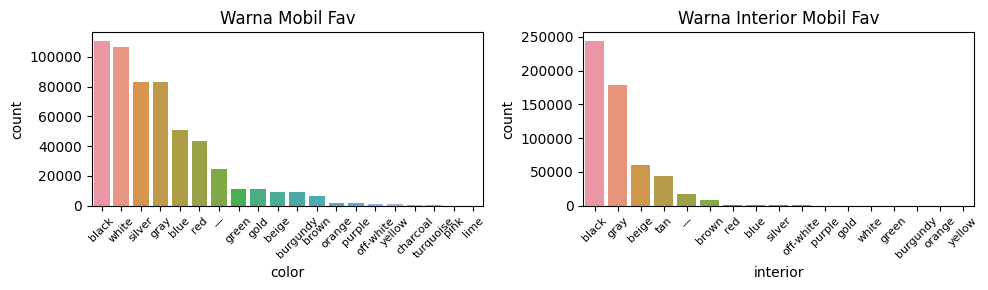

In [22]:
# Mengelompokan berdasarkan warna mobil dan warna interior
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

# Visualisasi warna favorit
plt.figure(figsize= (10, 3))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Warna Mobil Fav')
plt.xticks(rotation= 45, size= 8)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Warna Interior Mobil Fav')
plt.xticks(rotation= 45, size= 8)
plt.tight_layout()

Dapat dilihat bahwa :
1. Untuk warna mobil dan warna interior mobil paling disukai adalah warna hitam.
2. Terlihat juga bahwa warna interior mobil yang lazim digunakan adalah hitam, abu-abu, beige, dan tan.
3. Terdapat wrong value ( - ) pada warna dan interior mobil sehingga perlu dilakukan penanganan pada tahap berikutnya.

## MULTIVARIATE ANALYSIS

### Melihat Korelasi Antar Fitur Numerik

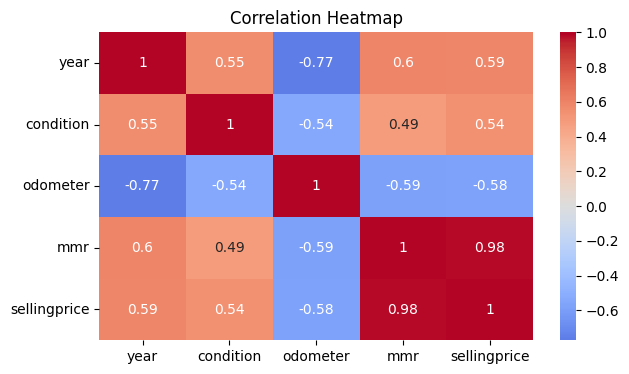

In [23]:
# Plot korelasi heatmap
corr_matrix = dfcar.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Korelasi antara `year` dan `sellingprice` adalah positif, menunjukkan bahwa semakin baru mobil, semakin tinggi harga jualnya.

2. Kolom `condition` memiliki korelasi positif dengan `sellingprice`, yang berarti semakin baik kondisi mobil, semakin tinggi harga jualnya.

3. Kolom `odometer` memiliki korelasi negatif dengan `sellingprice`, menunjukkan bahwa semakin sedikit jarak tempuh, semakin tinggi harga jualnya.

4. Kolom `mmr` memiliki korelasi positif yang cukup kuat dengan `sellingprice`, menunjukkan bahwa harga jual yang diprediksi oleh MMR memiliki korelasi yang baik dengan harga jual aktual.  

5. Kolom `Year` dan `Odometer` juga menunjukkan korelasi negative yang cukup tinggi, artinya mobil keluaran terbaru memiliki odometer yang cenderung kecil

### Korelasi MMR dan Selling Price

Seperti hasil analisis sebelumnya yang menunjukkan bahwa nilai MMR dan Selling Price memiliki kemiripan yang tinggi, maka kita akan coba memvisualisasikan bagaimana hubungan keduanya.

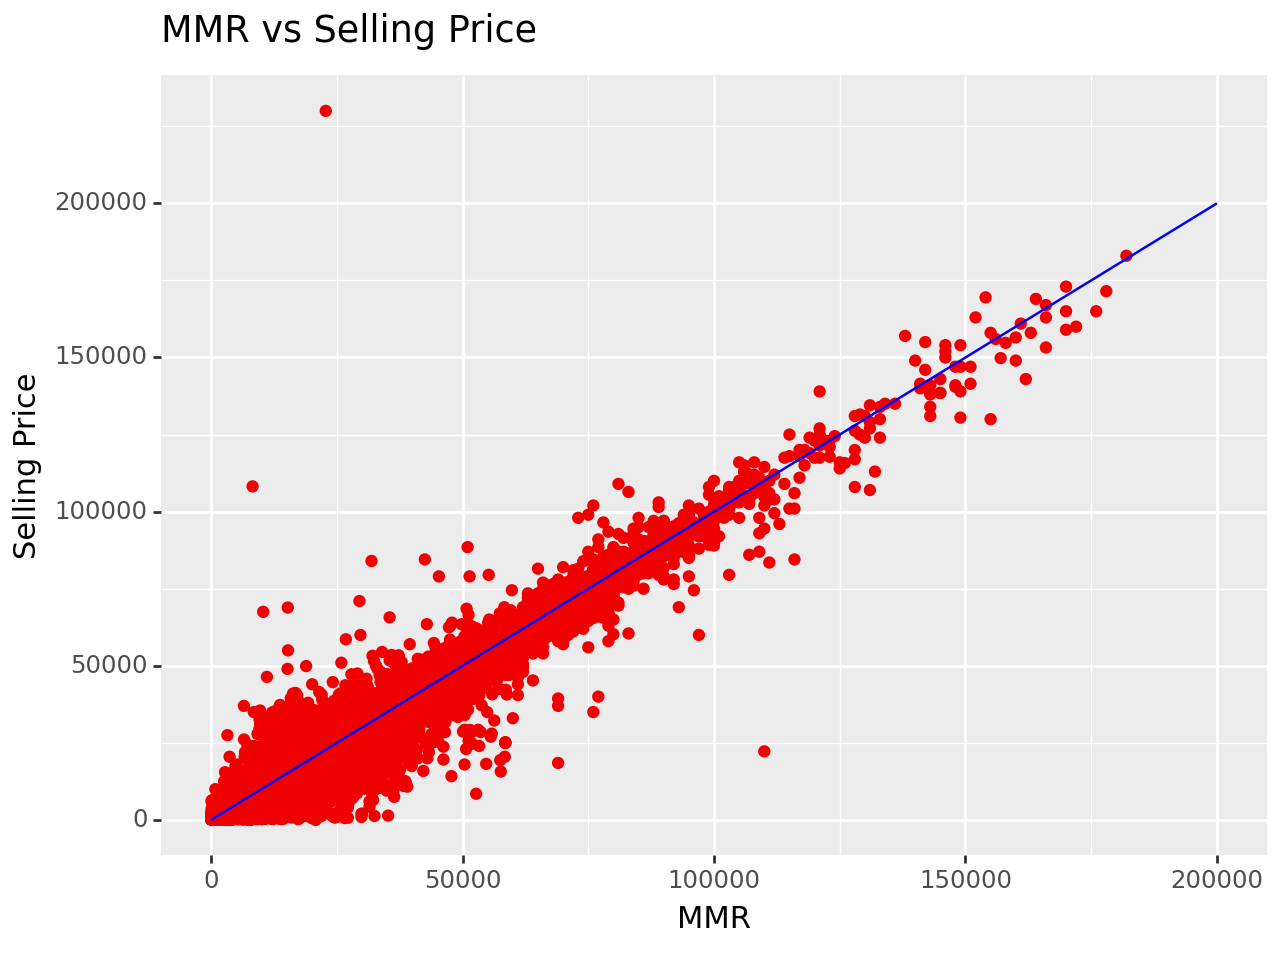

<Figure Size: (640 x 480)>

In [24]:
from plotnine import *

# Visualisasi MMR dan Selling Price
(ggplot(dfcar)
 + aes(x ='mmr', y ='sellingprice')
 + geom_point(color='#f00000')
 + labs(title='MMR vs Selling Price', x='MMR', y='Selling Price')
 + annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')
)

Grafik diatas menunjukkan bagaimana persebaran selling price terhadap MMR.  
MMR merupakan singkatan dari Manhiem Market Report yaitu sebuah spesific report yang menjadi indikator wholesale price untuk penjualan kendaraan. Perhitungan harga didasarkan pada lebih dari 10 juta transaksi penjualan selama 13 bulan sebelumnya dengan harga yang tepat oleh penjualan kendaraan nyata di Manheim auction houses.
Sehingga, bisa dikatakan bahwa MMR layak untuk dijadikan acuan harga.

### Korelasi Condition dan MMR Berdasar Tahun

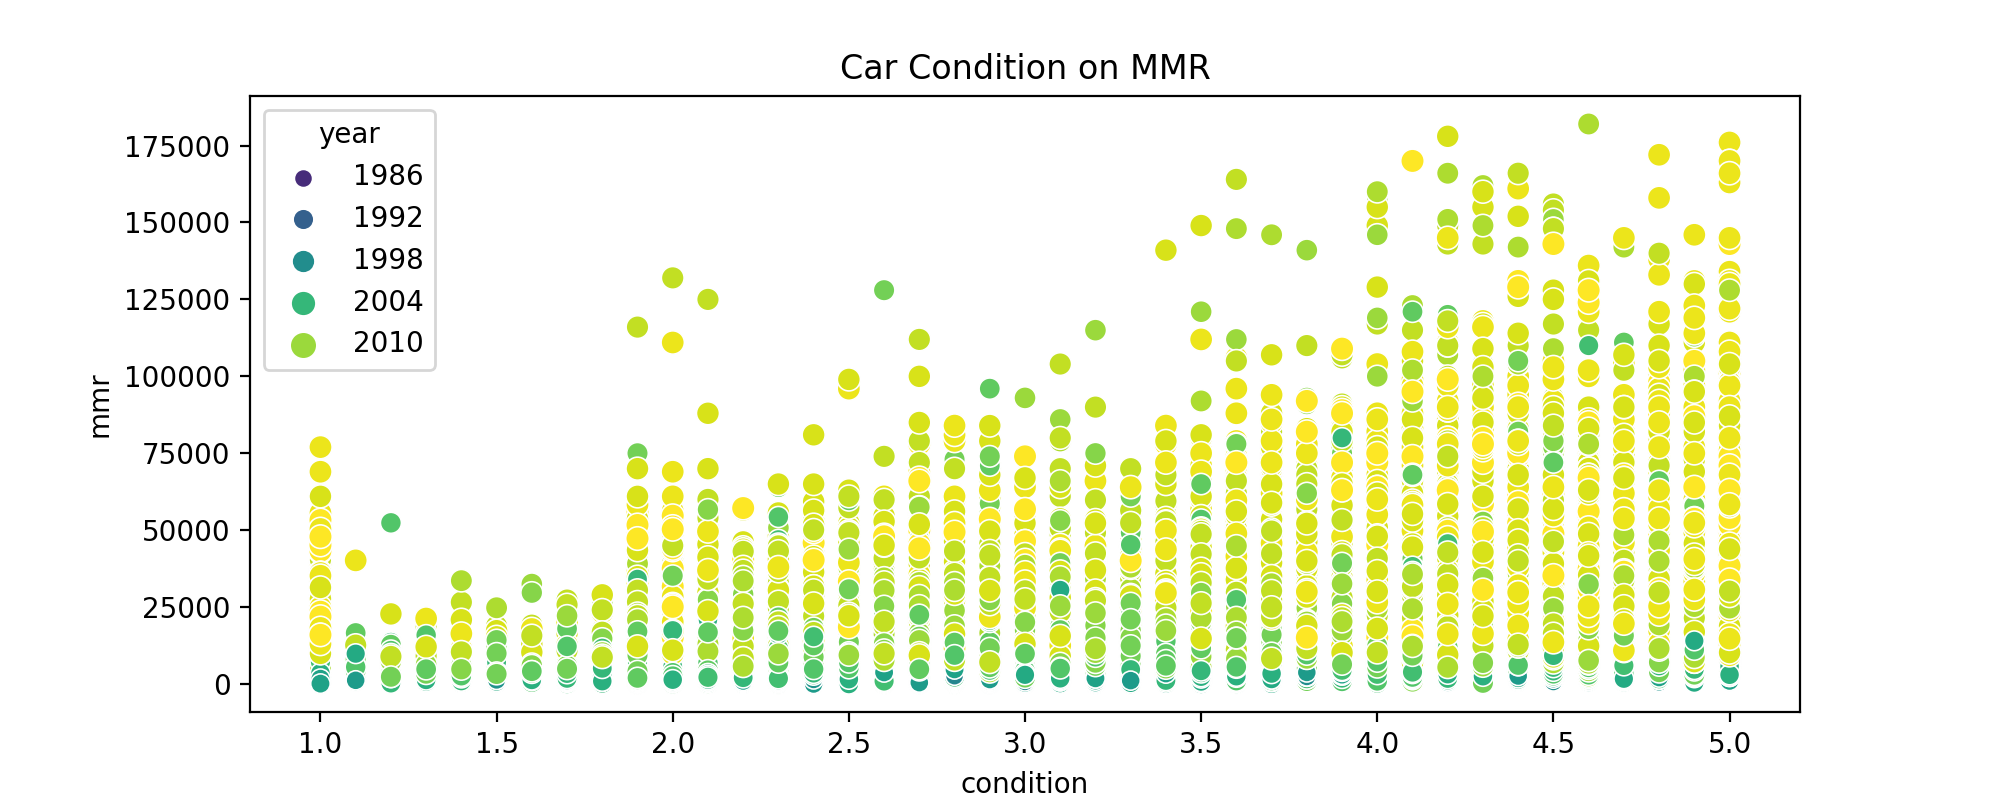

In [25]:
# Visualisasi korelasi harga jual terhadap kondisi mobil
plt.figure(figsize=(10, 4))
scatter = sns.scatterplot(data=dfcar, x='condition', y='mmr', hue='year', size= 'year', palette='viridis')
plt.title('Car Condition on MMR')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa pada setiap rentang kondisi mobil dengan MMR yang relatif rendah, terdapat mobil keluaran tahun 2004 keatas. Hal itu bisa mengindikasikan bahwa banyak mobil keluaran tahun 2004 yang dijual bekas.
Selain itu, produksi mobil sejak 2010 mengalami kenaikan pada kondisi nya dan mmr yang semakin tinggi pula. Hal tersebut menunjukkan bahwa MMR memiliki pengaruh kuat terhadap bagus nya kondisi dan tahun produksi mobil.  

----------

# BUSINESS INSIGHT AND VISUALIZATION

Pada bagian ini, kami mencoba menggali insight bisnis dan memvisualisasikannya. Kami akan menggunakan dataset copy sebagai pembeda dalam proses pemodelan. Beberapa insight bisnis yang kami coba gali adalah :  
**1. Bagaimana persentase penjualan**  
Seperti analisis di awal memulai project, kami sempat mengatakan bahwa secara perhitungan sederhana terdapat sekitar 51% mobil terjual dengan harga dibawah MMR, dimana MMR merupakan harga acuan dalam dunia penjualan mobil bekas. Selanjutnya kami akan mencoba melakukan perhitungan kembali.

**2. Rata-rata Sales Dalam Periode Bulanan dan Harian**  
Lebih lanjut kami melihat bagaimana rata-rata sales dalam periode bulanan dan harian jika ditinjau dari acuan harga MMR. Hal ini bertujuan untuk mengetahui kapan terjadinya penjualan yang dibawah atau diatas harga MMR.

**3. Jumlah Transaksi Bulanan, Harian, dan Jam**  
Jumlah transaksi ini digunakan untuk mengetahui bagaimana customer behaviour jika ditinjau dari kapan mereka membeli mobil. Kita bisa mengetahui juga kapan memanfaatkan momentum untuk melakukan marketing ataupun meningkatkan strategi penjualan.

**4. Top Merek Mobil**  
Menmampilkan merk-merk mobil yang paling banyak terjual selama periode 2015.

##1. Persentase Penjualan
Pertama kami akan menggunakan dataset copy untuk memisahkan penggalian insight dan pemodelan. Selanjutnya kami memisahkan fitur `saledate` ke dalam beberapa spesific time, lalu akan mengkategorikan beberapa value pada fitur kategorikal untuk mempermudah proses perhitungan.

In [26]:
# Meng-copy dataset
copy = dfcar.copy()

# 'is_sold_below_mmr' berisi keterangan apakah mobil terjual dibawah MMR atau tidak (1=Ya, 0=Tidak)
copy['is_sold_below_mmr'] = copy.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

# Menghitung persentase penjualan
transaction = copy.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_sold_below_mmr,,
0,272386,48.740
1,286425,51.260


In [27]:
copy.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,is_sold_below_mmr
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1


## 2. Rata-rata Sales Terhadap MMR

In [28]:
# Mengubah tipe data object ke datetime
timeget = []
for i in copy['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
copy['datetime'] =  pd.to_datetime(timeget)

In [29]:
# Mengubah tipe data object ke datetime
copy['datetime'] =  pd.to_datetime(timeget)

# Membuat fitur baru dari kolom 'datetime'
copy['hour'] = copy['datetime'].apply(lambda time: time.strftime('%H:%M:%S'))
copy['month'] = copy['datetime'].apply(lambda time: time.month)
copy['day of week'] = copy['datetime'].apply(lambda time: time.dayofweek)

In [30]:
# Mapping spesific day of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
copy['day of week'] = copy['day of week'].map(dmap)
copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,is_sold_below_mmr,datetime,hour,month,day of week
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,...,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0,2014-12-16 12:30:00,12:30:00,12,Tue
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,...,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0,2014-12-16 12:30:00,12:30:00,12,Tue
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,...,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1,2015-01-15 04:30:00,04:30:00,1,Thu
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.100,14282.000,...,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),0,2015-01-29 04:30:00,04:30:00,1,Thu
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.300,2641.000,...,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),0,2014-12-18 12:30:00,12:30:00,12,Thu


In [31]:
# Pembuatan beberapa kolom yang berkaitan dengan waktu:
## Kolom 'hour_only', khusus hanya mengeluarkan jam (kolom 'hour' bernilai jam:menit:detik)
copy['hour_only'] = copy['datetime'].dt.hour

## Membuat kolom 'month_year', khusus hanya bulan dan tanggal, tanpa jam (kolom 'datetime' bernilai tanggal dan jam)
copy['month_year'] = copy.datetime.dt.strftime('%b-%y')

## Membuat kolom 'date', khusus hanya tahun-bulan-tanggal, tanpa jam (kolom 'datetime' bernilai tanggal dan jam)
copy['date'] = copy['datetime'].dt.date
copy['date'] = pd.to_datetime(copy['date'], format = '%Y-%m-%d')

### Bulanan

Kita akan melihat bagaimana rata-rata penjualan terhadap MMR dalam periode bulanan. Data yang disajikan hanyalah sebagian sampel dari jangka waktu yang ada. Disini kami mengambil tiap quarter dari tahun 2014-2015 dimana dari hasil EDA sebelumnya terlihat bahwa banyak penjualan terjadi di tahun-tahun tersebut.

In [32]:
# Melakukan grouping berdasarkan kolom 'month_year'
monthly_sale_summary = copy.groupby(['month_year']).agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
monthly_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

# Sorting Date secara manual
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['date'], key=lambda x: x.map(custom_dict))

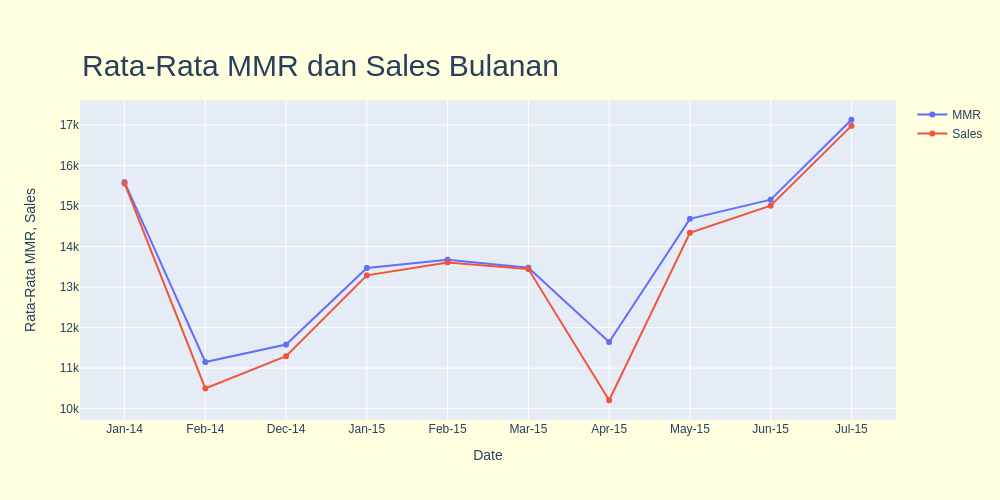

In [33]:
# Visualisasi Rata-rata Sales dan MMR Periode Bulanan
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.mmr_avg,name='MMR'))
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.selling_avg, name='Sales'))

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Rata-Rata MMR dan Sales Bulanan', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Jumlah rata – rata sales di setiap bulannya selalu lebih rendah daripada nilai MMR-nya.

### Harian

In [34]:
# Melakukan grouping berdasarkan kolom 'date'
daily_sale_summary = copy.groupby('date').agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
daily_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

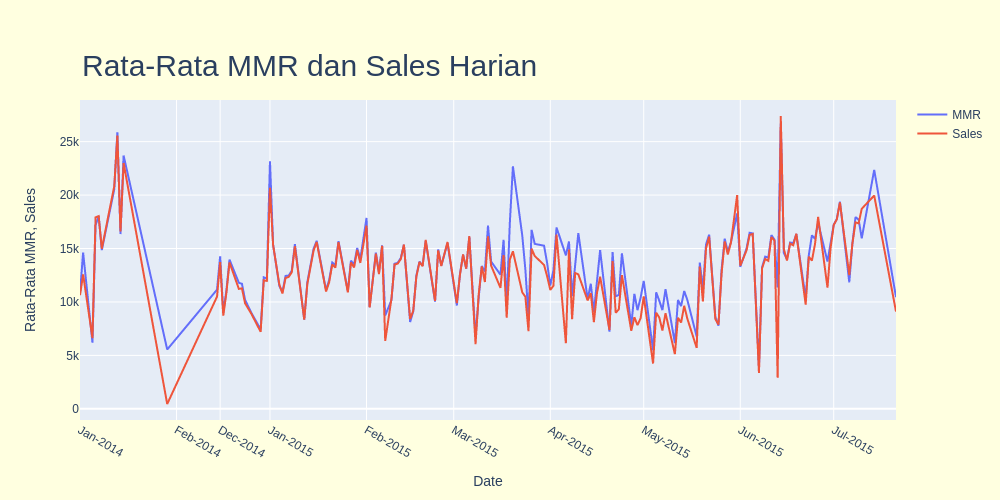

In [35]:
# Visualisasi Rata-rata Sales dan MMR Periode Harian
dt_breaks = pd.date_range(start='2014-02-15', end='2014-12-15', freq='D')
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sale_summary.date,y =daily_sale_summary.mmr_avg, name='MMR'))

fig.add_trace(go.Scatter(x=daily_sale_summary.date, y=daily_sale_summary.selling_avg, name='Sales'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Rata-Rata MMR dan Sales Harian', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

# Set axis title
fig.update_xaxes(title_text="Date", rangebreaks=[dict(values=dt_breaks)], tickformat = '%b-%Y', dtick='M1')
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Dari plot harian ini lebih dapat terlihat bahwa terdapat beberapa titik dimana penjualan mobil sama atau bahkan lebih tinggi dari pada MMR dibanding bila dilihat dari plot bulanan.

## 3. Jumlah Transaksi

### Jumlah Transaksi Bulanan

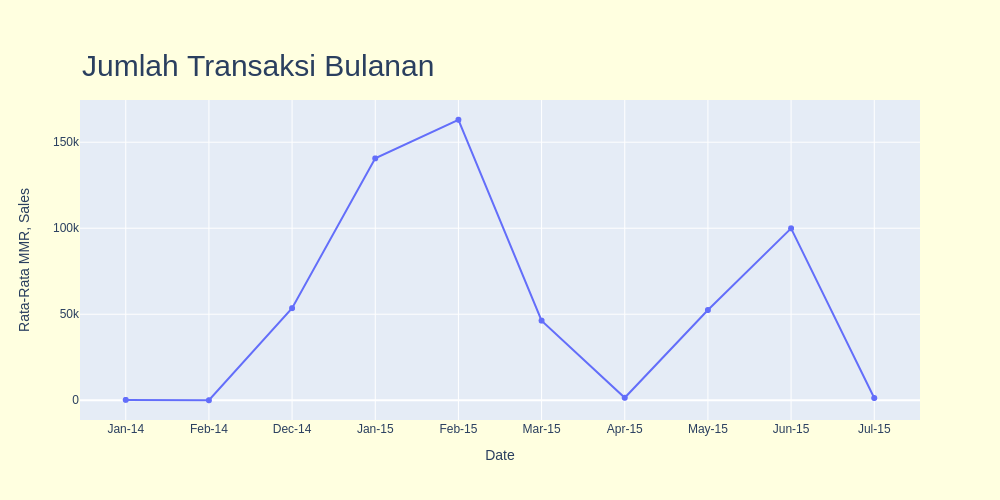

In [36]:
# Visualisasi Jumlah Transaksi Periode Bulanan
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.total_transaction, name='MMR'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Jumlah Transaksi Bulanan', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show('png')

Puncak transaksi terjadi pada Feb-2015 (Sekitar 160rb Transaksi), setelahnya terjadi penurunan transaksi hingga Apr-2015 dan kembali naik hingga Jun-2015.

## 4. Top Merk Mobil

In [37]:
import plotly.express as px

# Melakukan grouping berdasarkan kolom 'month_year' dan merek mobil, dan menghitung jumlahnya
monthly_brand_summary = copy.groupby(['month_year', 'make']).size().reset_index(name='count')

# Mengurutkan berdasarkan bulan dan tahun (month_year) dan jumlah terjual (count) secara descending
monthly_brand_summary = monthly_brand_summary.sort_values(by=['month_year', 'count'], ascending=[True, False])

# Mengambil 10 merek mobil terbanyak setiap bulannya
top_5_brands_per_month = monthly_brand_summary.groupby('month_year').head(5)

# Filter data hanya untuk tahun 2015
monthly_brand_summary_2015 = top_5_brands_per_month[top_5_brands_per_month['month_year'].str.contains('15')]

# Mengubah kolom 'month_year' menjadi tipe data kategori dengan urutan yang diinginkan
month_order = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15']
monthly_brand_summary_2015['month_year'] = pd.Categorical(monthly_brand_summary_2015['month_year'], categories=month_order, ordered=True)

# Mengurutkan hasil berdasarkan bulan yang diinginkan
monthly_brand_summary_2015 = monthly_brand_summary_2015.sort_values(by=['month_year'])

# Visualisasi Barplot Jumlah Penjualan Bulanan dengan hue merek mobil hanya untuk tahun 2015
fig = px.bar(monthly_brand_summary_2015, x='month_year', y='count', color='make',
             labels={'month_year': 'Date', 'count': 'Jumlah Penjualan Bulanan'},
             title='5 Merek Mobil Paling Banyak Terjual Setiap Bulan di Tahun 2015')

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Jumlah Penjualan Bulanan')

# Mengatur showlegend menjadi False untuk hanya menampilkan legenda 5 merek saja
for trace in fig.data:
    if trace.name not in monthly_brand_summary_2015['make'].head(5).unique():
        trace.showlegend = False

fig.show()


Dari Bar Plot diatas diperoleh informasi
1. Bulan Februari merupakan penjualan terbanyak dibanding bulan lainnya.bold text
2. Mobil ford adalah merek yang paling banyak terjual terutama pada Januari dan Febuari 2015. Hal ini menunjukkan bahwa Ford memiliki pangsa pasar yang kuat.
3. Bulan April dan Juli merupakan penjualan paling rendah dibandingkan dengan bulan lainnya di tahun 2015.

# Data Preparation

----

## Data Cleansing

### Dropping

**Duplicated Rows**

Pada tahap Data Exploration sebelumnya, terlihat bahwa tidak ada duplicate rows sehingga tidak perlu penanganan.

**Rows with Extreme Values**

Pada tahap EDA sebelumnya, kita menemukan baris-baris yang memiliki outliers ekstrim dan tidak masuk akal. Maka, di tahap data cleaning ini kita akan menghapus baris-baris tersebut.

In [38]:
dfcar2 = dfcar.copy()

In [39]:
# Drop nilai min odo
i_min_odo = dfcar2[((dfcar2.odometer == 1.000))].index
dfcar2 = dfcar2.drop(i_min_odo)

In [40]:
# Drop nilai max odo
i_max_odo = dfcar2[((dfcar2.odometer == 999999.000))].index
dfcar2 = dfcar2.drop(i_max_odo)

In [41]:
# Drop nilai min sellingprice
i_min_price = dfcar2[((dfcar2.sellingprice == 1.000))].index
dfcar2 = dfcar2.drop(i_min_price)

In [42]:
# Drop nilai min mmr
i_min_mmr = dfcar2[((dfcar2.mmr == 25.000))].index
dfcar2 = dfcar2.drop(i_min_mmr)

In [43]:
dfcar2.shape

(557391, 16)

**Irrelevant Features**

Beberapa fitur terlihat kurang relevan dan unique value yang dimiliki terlalu luas seperti yang sudah kita analisis sebelumnya. Sehingga diasumsikan bahwa fitur tersebut tidak memiliki pola tertentu. Fitur tersebut adalah `vin`, `sellingprice`, dan `saledate` yang akan dihapus. Alasannya yaitu :  
a. `vin` bukanlah fitur yang menentukan harga mobil karena hanya berfungsi sebagai idetification number dari mobil.  
b. `sellingprice` memiliki korelasi tinggi (0.98) dengan `mmr` (fitur target).  
c. `saledate` tidak menunjukkan faktor yang cukup signifikan dikarenakan waktu yang terlalu luas dan tidak menentu sehingga tidak ada pola khusus yang mempengaruhi harga jual mobil.

In [44]:
# Menghapus fitur kurang relevan
dfcar2 = dfcar2.drop(['vin','sellingprice','saledate'], axis=1)
dfcar2.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,16639.000,white,black,"kia motors america, inc",20500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900


### Handle Unique Values

Pada beberapa fitur terdapat banyak sekali unique values seperti yang sudah dieksplor sebelumnya. Kita akan menghandle unique values yang tidak seragam tersebut menjadi :  
1. Semua categorical data kecuali saledate akan diubah menjadi lower case untuk mendapatkan value yang bernilai sama.  
2. Nilai " — " pada fitur `color` dan `interior` akan diganti dengan nilai modus, yaitu black.  

In [45]:
# Fungsi untuk mengubah nama kolom menjadi lowercase
def content_consistent(df):
    cols = df.select_dtypes(object).columns.difference(['saledate'])
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

dfcar2 = content_consistent(dfcar2)

In [46]:
import re

# Replace color and interior
dfcar2['color'].replace('—','black',inplace=True)
dfcar2['interior'].replace('—','black',inplace=True)

# Replace model dan trim dgn menghilangkan special chars
dfcar2['model'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['trim'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['seller'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)

# Replace same meaning of value
dfcar2['make'].replace('landrover','land rover',inplace=True)
dfcar2['make'].replace('mercedes-b','mercedes-benz',inplace=True)
dfcar2['make'].replace('mercedes','mercedes-benz',inplace=True)
dfcar2['make'].replace('vw','volkswagen',inplace=True)
dfcar2['make'].replace('ford tk','ford truck',inplace=True)
dfcar2['body'].replace('koup','coupe',inplace=True)
dfcar2['body'].replace('regular-cab','regular cab',inplace=True)
dfcar2['body'].replace('xtracab','extended cab',inplace=True)

In [47]:
# Melihat hasil penanganan inkonsistensi value dan kolom
c = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state', 'seller']

dfcar2[c].describe()

,make,model,trim,body,color,interior,state,seller
count,547162,547064,546817,544286,556662,556662,557391,557391
unique,61,841,1883,42,19,16,38,14152
top,ford,altima,base,sedan,black,black,fl,nissaninfiniti lt
freq,93834,19322,55641,240696,135399,260895,82780,19691


Setelah dilakukan pembersihan data dengan menyamaratakan penulisan string, maka terlihat hasilnya dimana:  
a. `make` yang awalnya 96 kini hanya 61 unique values  
b. `model` yang awalnya 973 kini hanya 841 unique values  
c. `trim` yang awalnya 1975 kini hanya 1883 unique values  
d. `body` yang awalnya 86 kini hanya 42 unique values   
e. `seller` yang awalnya 14264 kini hanya 14152 unique values  
f. `color` dan `interior` berkurang 1 nilai dari unique value sebelumnya dikarenakan sudah digantikan oleh nilai modus (black).  
g. `state` adalah satu-satunya yang masih bernilai sama.

### Handle Missing Values

Terdapat 9 fitur yang memiliki Null value, yaitu `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.

Namun, dikarenakan fitur color dan interior telah dihapus, maka kita hanya perlu meng-handle fitur lainnya.  
1. Seluruh categorical data akan diisi dengan nilai modus.  
2.  `condition` yang memiliki persebaran data yang lumayan normal, maka akan diisi dengan nilai mean.
3. `odometer` yang hanya memiliki 94 null values, kita akan menghapusnya.

In [48]:
# Imputasi null value dengan mode
mode_value = dfcar2.filter(['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']).mode()
cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

dfcar2[cols] = dfcar2[cols].fillna(dfcar2.mode().iloc[0])

In [49]:
# Imputasi null value dengan mean
dfcar2['condition'] = dfcar2['condition'].fillna(dfcar2['condition'].mean())

In [50]:
# Menghapus sisa null value
dfcar2.dropna(axis=0, inplace=True)
dfcar2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

### Handle Outliers

In [51]:
df_clean = dfcar2.copy()

In [52]:
# Fungsi untuk mengecek outlier
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    nama_kolom = df.columns[column]
    jumlah_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    persentase_outliers = round(((jumlah_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Jumlah Outliers pada kolom ', nama_kolom, ' :', jumlah_outliers, ' dan persentase outliers:', persentase_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('periksa mode yang diinputkan')

In [53]:
# Memeriksa presentase outlier setiap kolom
column = [0, 7, 8, 12]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Jumlah Outliers pada kolom  year  : 6025  dan persentase outliers: 1.08 %
Jumlah Outliers pada kolom  condition  : 0  dan persentase outliers: 0.0 %
Jumlah Outliers pada kolom  odometer  : 10270  dan persentase outliers: 1.84 %
Jumlah Outliers pada kolom  mmr  : 16307  dan persentase outliers: 2.93 %


In [54]:
# Menghapus outliers
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 0, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 8, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 12, 'df').reset_index()['index'])]
df_clean.shape

(527806, 13)

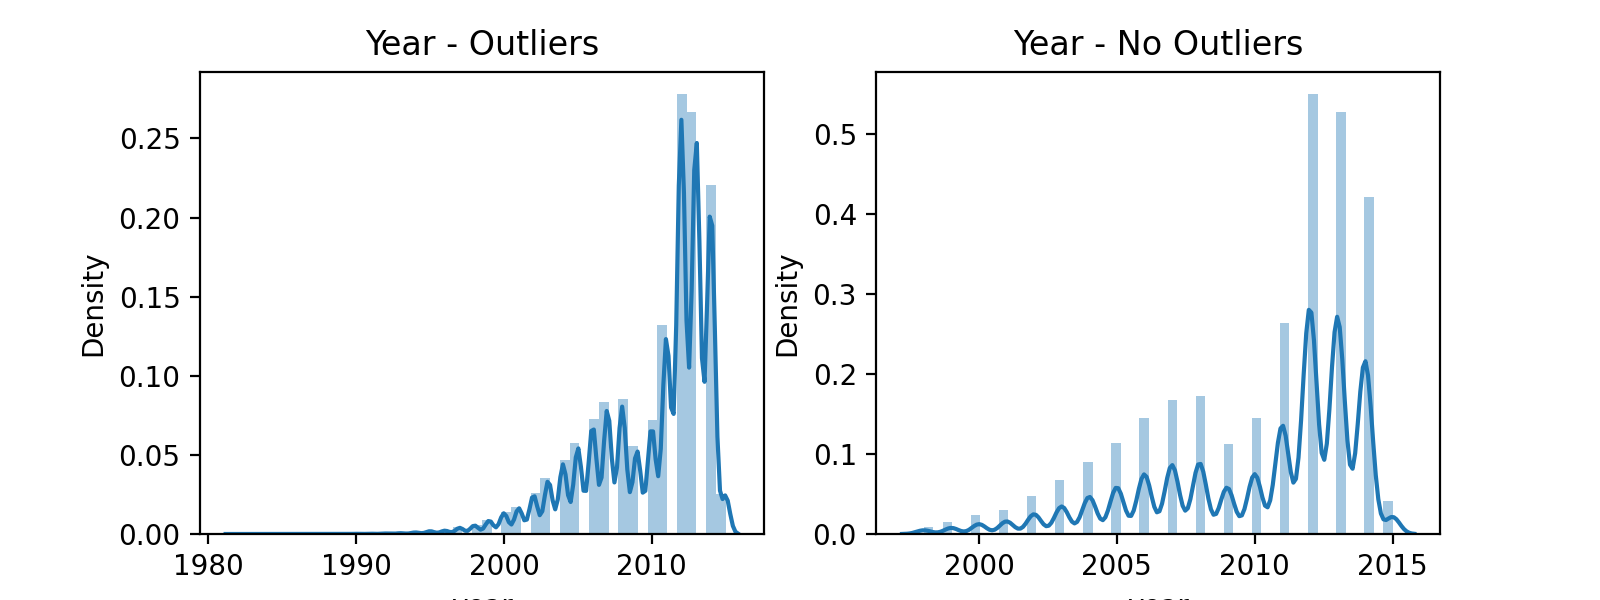

In [55]:
# Membuat Plot Untuk Membandingkan dengan kondisi sebelum penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.year)
plt.title('Year - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.year)
plt.title('Year - No Outliers')
plt.show()

In [56]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal year : {round(dfcar2.year.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru year : {round(df_clean.year.skew(), 3)}")

Koefisien Skewness Awal year : -1.186
Koefisien Skewness Baru year : -1.017


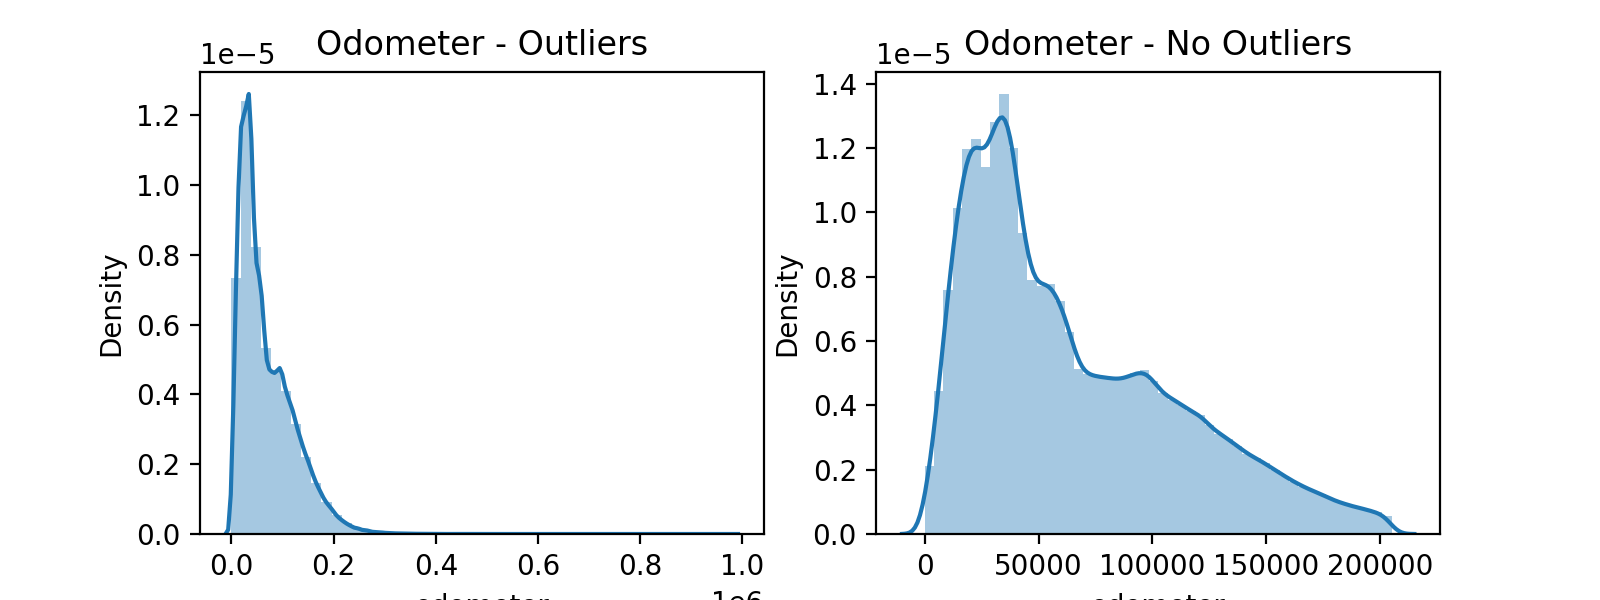

In [57]:
# Visualisasi hasil penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.odometer)
plt.title('Odometer - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.odometer)
plt.title('Odometer - No Outliers')
plt.show()

In [58]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal odometer : {round(dfcar2.odometer.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru odometer : {round(df_clean.odometer.skew(), 3)}")

Koefisien Skewness Awal odometer : 1.236
Koefisien Skewness Baru odometer : 0.841


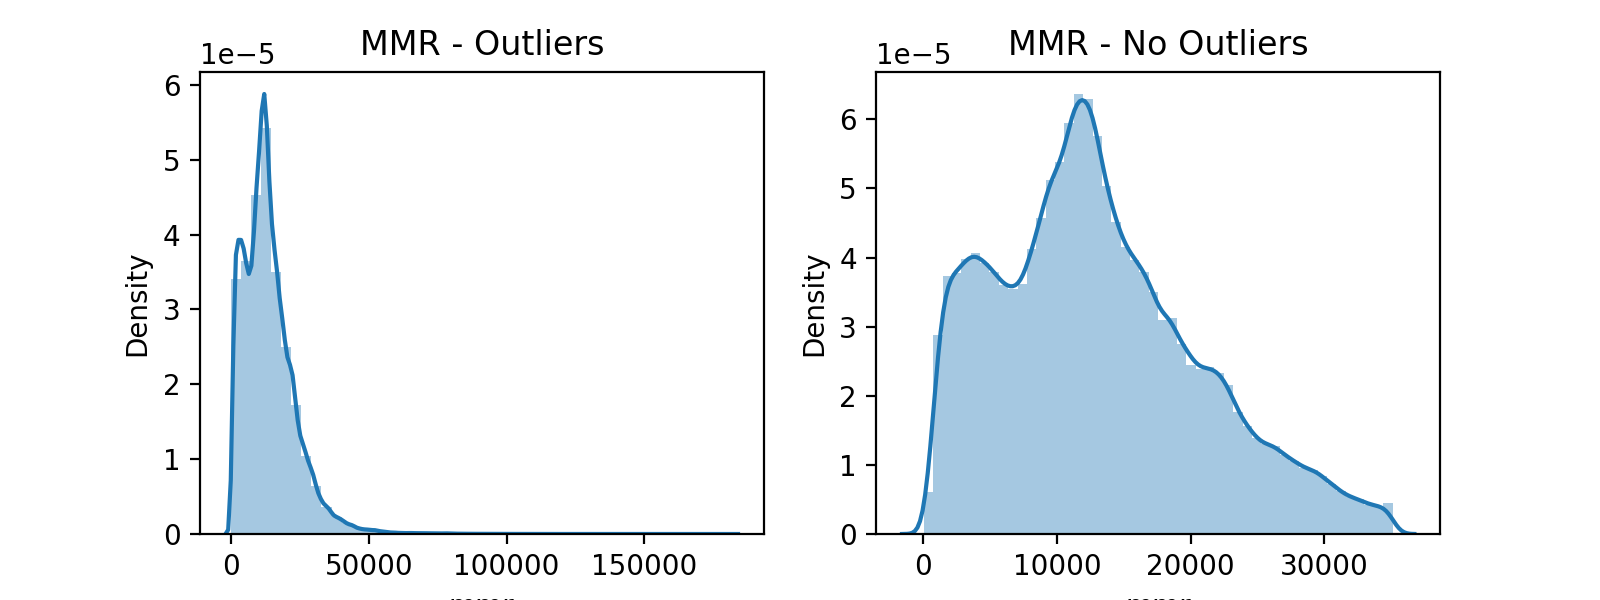

In [59]:
# Visualisasi hasil penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.mmr)
plt.title('MMR - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.mmr)
plt.title('MMR - No Outliers')
plt.show()

In [60]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal mmr : {round(dfcar2.mmr.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru mmr : {round(df_clean.mmr.skew(), 3)}")

Koefisien Skewness Awal mmr : 1.998
Koefisien Skewness Baru mmr : 0.544


## Feature Engineering

### Feature Extraction

Dikarenakan pada dataset terdapat banyak fitur kategorikal, maka kita perlu mengubahnya terlebih dahulu menjadi angka. Namun sebelum itu, kita perlu melakukan fitur ekstraksi (feature extraction) untuk melihat pola-pola tertentu yang bisa menyederhanakan proses perubahan fitur nantinya (feature encoding).

#### Overall
Segmentasi kondisi overall berdasarkan rata-rata `condition` dan `odometer`.

In [61]:
# Grouping 'condition' dan 'odometer' berdasarkan nilai tengah
df_yearcond = df_clean.groupby(['condition', 'odometer']).agg({'mmr' : ['mean','median']})
df_yearcond.describe()

mmr           
            mean     median
count 482570.000 482570.000
mean   12912.635  12907.897
std     7472.915   7473.601
min       50.000     50.000
25%     7200.000   7200.000
50%    12150.000  12150.000
75%    17600.000  17600.000
max    35100.000  35100.000

In [62]:
# Fungsi untuk segmentasi kolom 'overall'
def segment(x):
    if x['odometer'] <= 7200:
        segment = 'Poor'
    elif x['odometer'] > 7200 and x['odometer'] <= 12150:
        segment = 'Fair'
    elif x['odometer'] > 12150 and x['odometer'] <= 17600:
        segment = 'Good'
    else:
        segment = 'Very Good'
    return segment

df_clean['Overall'] = df_clean.apply(lambda x: segment(x), axis=1)

#### Made In

Menyederhanakan value pada fitur `make` dengan mengkategorikan merk mobil sesuai asal negara pembuat nya.

In [63]:
# Segmentasi brand mobil berdasarkan negara pembuat
us_made = ['chevrolet', 'ford', 'buick', 'cadillac', 'jeep', 'dodge', 'chrysler', 'ram', 'scion', 'pontiac', 'saturn', 'mercury', 'hummer', 'gmc', 'gmc truck',
           'oldsmobile', 'ford truck', 'lincoln', 'plymouth', 'airstream']
germany_made = ['bmw', 'audi', 'mercedes-benz', 'porsche', 'smart', 'chev truck', 'volkswagen']
japan_made = ['nissan', 'acura', 'lexus', 'infiniti', 'mitsubishi', 'mazda', 'toyota', 'subaru', 'honda', 'suzuki', 'isuzu', 'mazda tk']
uk_made = ['mini', 'land rover', 'jaguar']
italy_made = ['fiat', 'maserati']
korea_made = ['kia', 'hyundai', 'hyundai tk', 'daewoo']
swedia_made = ['volvo', 'saab']

made_in = []

for maker in df_clean['make']:
    if maker in us_made:
        country = 'US'
    elif maker in germany_made:
        country = 'DEU'
    elif maker in japan_made:
        country = 'JPN'
    elif maker in uk_made:
        country = 'UK'
    elif maker in italy_made:
        country = 'ITA'
    elif maker in korea_made:
        country = 'KOR'
    else:
        country = 'SWE'

    made_in.append(country)

df_clean['made_in'] = made_in

#### Top Make
Segmentasi `make` berdasarkan 11 top brand. Nilai 'Other' adalah untuk brand di luar 11 brand tersebut.

In [64]:
# Segmentasi top brand
top_make = df_clean.groupby('make')['year'].count().reset_index().sort_values('year', ascending=False)
top_make = top_make.iloc[:11]
top_make.drop('year', axis=1, inplace=True)
top_make['top_make'] = top_make['make']
top_make

,make,top_make
13,ford,ford
7,chevrolet,chevrolet
36,nissan,nissan
48,toyota,toyota
10,dodge,dodge
17,honda,honda
19,hyundai,hyundai
25,kia,kia
8,chrysler,chrysler
3,bmw,bmw


In [65]:
df_clean = df_clean.merge(top_make, how='left', on='make')
df_clean['top_make'].fillna('Other', inplace=True)
df_clean['top_make'].unique()

array(['kia', 'bmw', 'Other', 'nissan', 'chevrolet', 'ford', 'hyundai',
       'jeep', 'toyota', 'dodge', 'chrysler', 'honda'], dtype=object)

### Feature Selection

Setelah semua fitur menjadi numerik, selanjutnya kita bisa menghapus kolom kategori awal dan kolom yang tidak diperlukan.

In [66]:
# Menghapus fitur yang kurang relevan
df_clean = df_clean.drop(['make', 'transmission'], axis=1)
df_clean.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,seller,mmr,Overall,made_in,top_make
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,kia motors america inc,20500,Good,KOR,kia
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,kia motors america inc,20800,Fair,KOR,kia
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,financial services remarketing lease,31900,Poor,DEU,bmw


### Feature Encoding

#### One-Hot Encoding  

Melakukan OHE terhadap fitur yang sudah memiliki pola tertentu atau kategori kemiripan, namun bukan merupakan data ordinal.

In [67]:
df_pre = df_clean.copy()

In [68]:
# Melakukan One Hot Encoding karena data tidak memiliki urutan
df_pre = pd.get_dummies(df_pre, columns=['Overall', 'made_in', 'top_make'])
df_pre.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,seller,...,top_make_chevrolet,top_make_chrysler,top_make_dodge,top_make_ford,top_make_honda,top_make_hyundai,top_make_jeep,top_make_kia,top_make_nissan,top_make_toyota
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,kia motors america inc,...,0,0,0,0,0,0,0,1,0,0
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,kia motors america inc,...,0,0,0,0,0,0,0,1,0,0
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,financial services remarketing lease,...,0,0,0,0,0,0,0,0,0,0


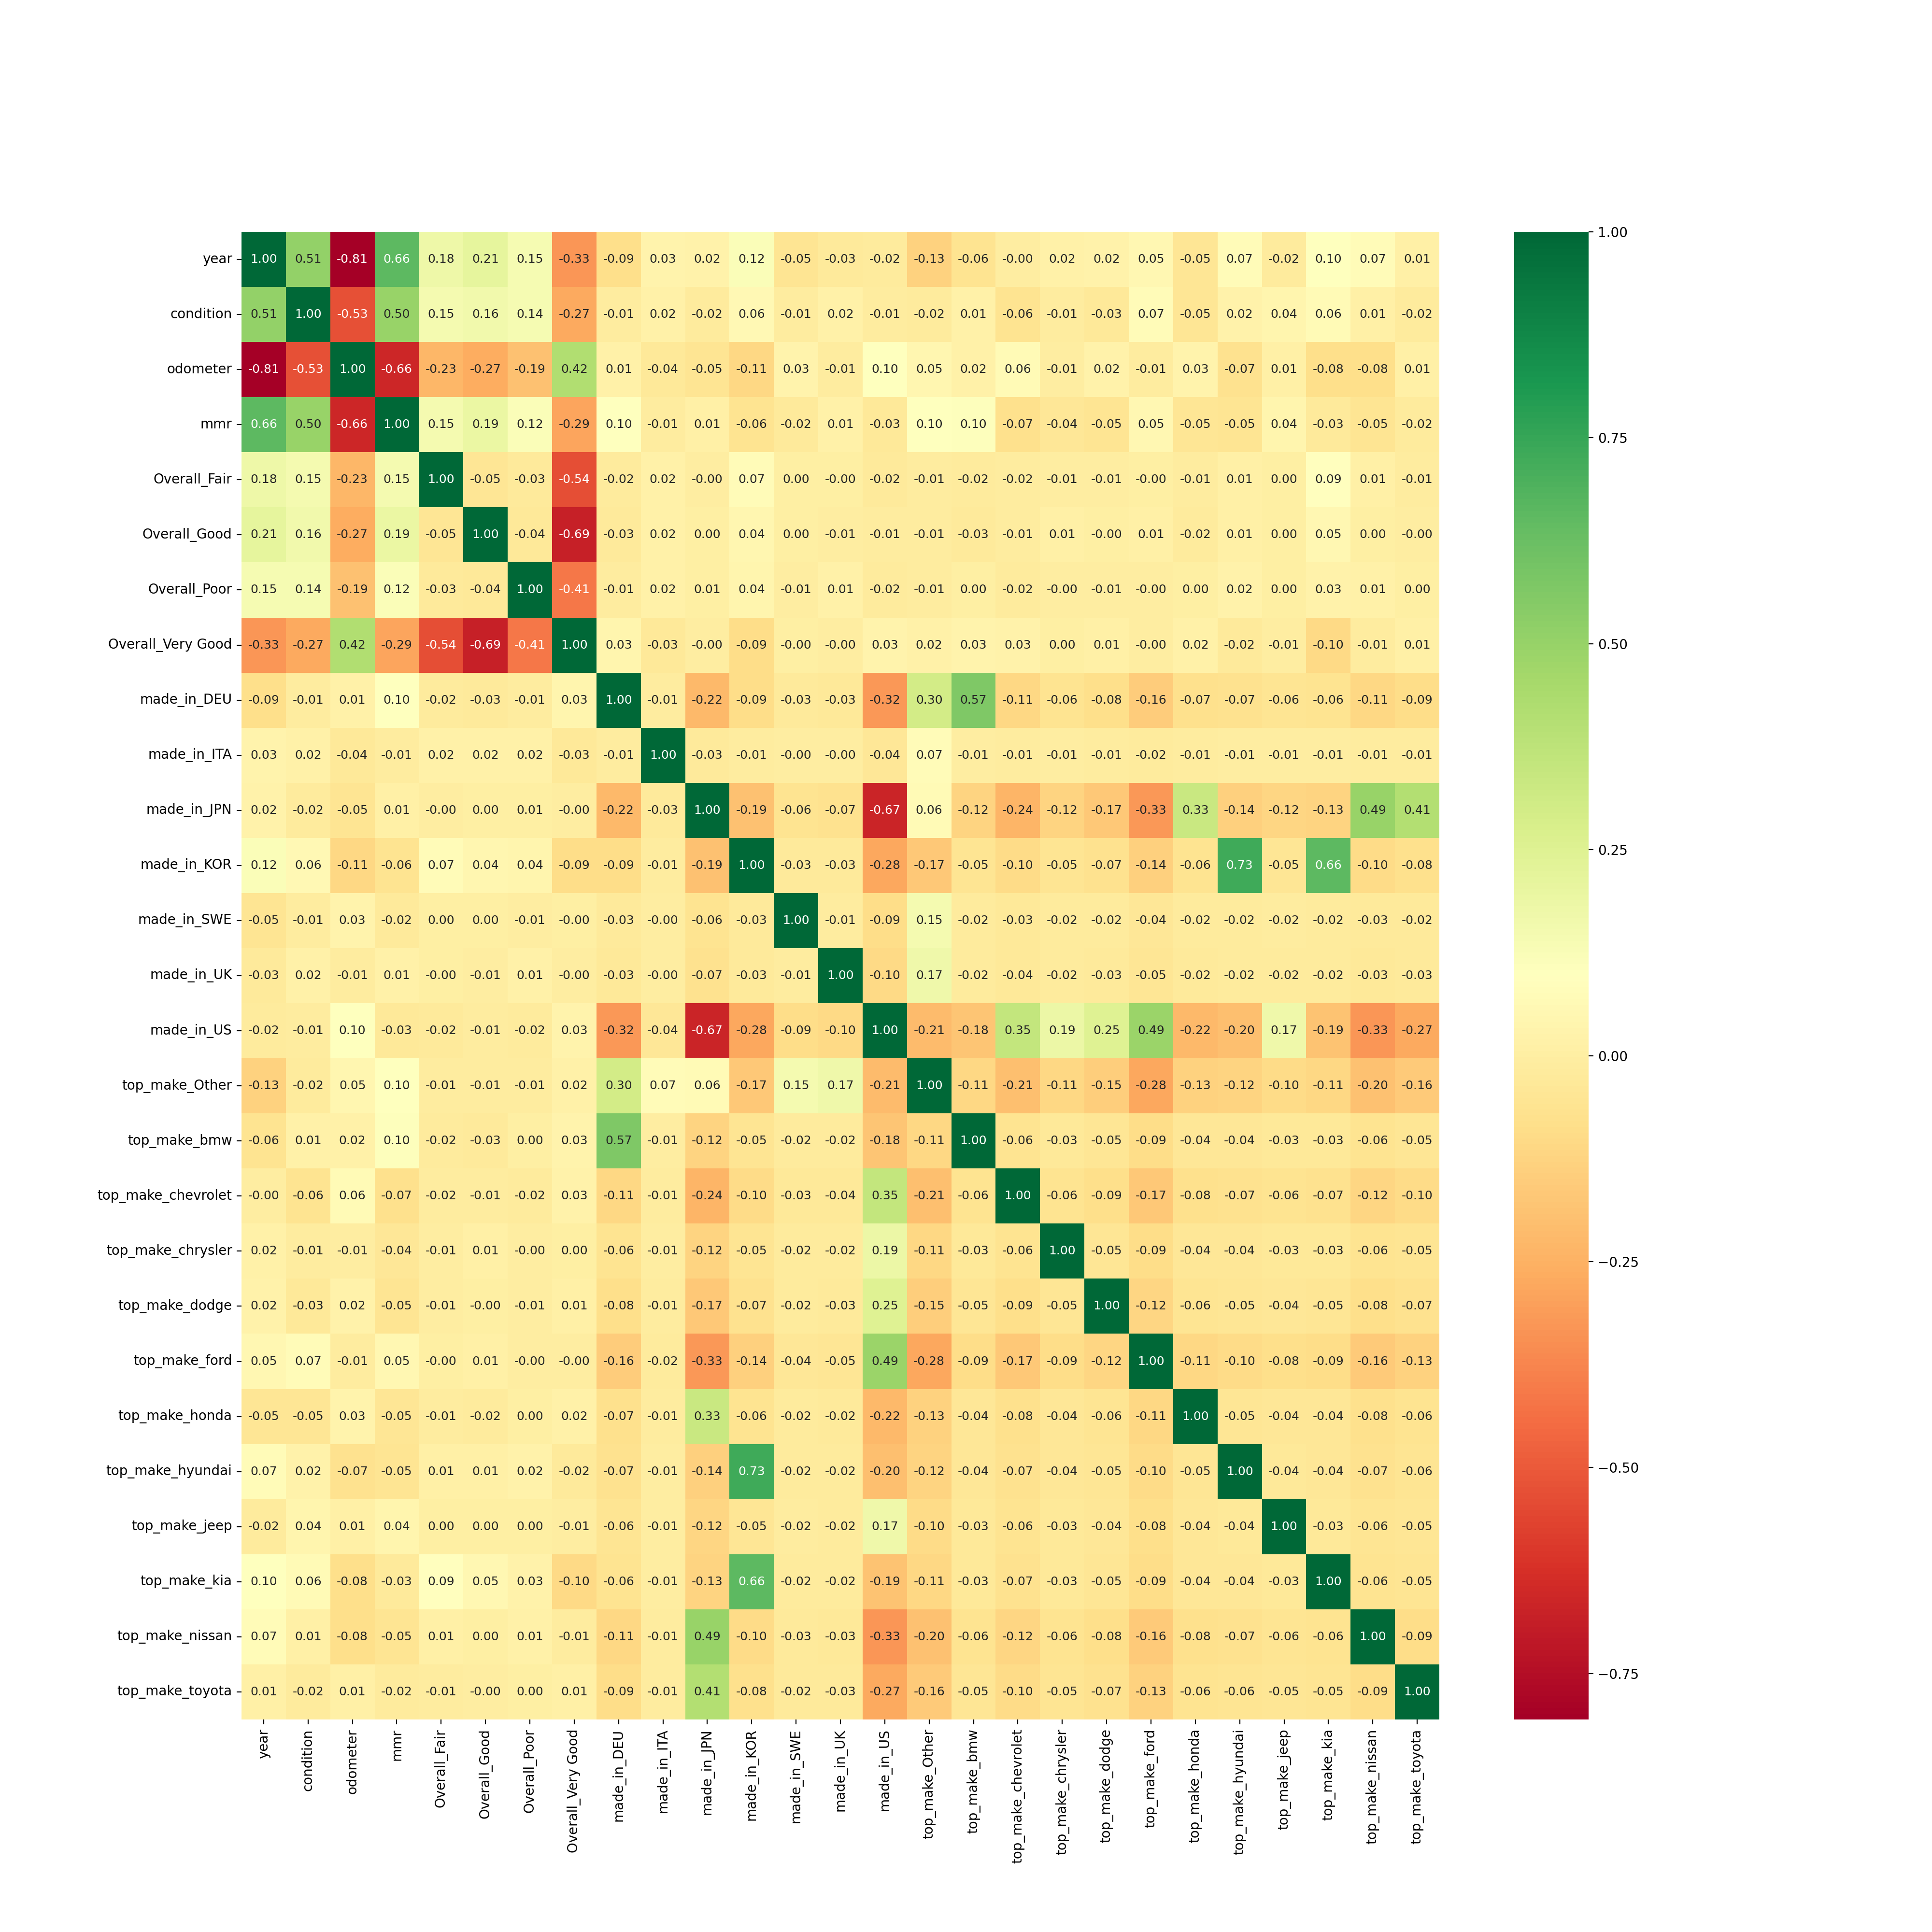

In [69]:
# Plot korelasi heatmap
corr_matrix = df_pre.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 9}, ax=ax)
plt.show()

#### Target Encoding
Target encoding dilakukan pada beberapa fitur untuk mempertahankan informasi penting yang terkandung dalam fitur kategori, terutama dalam konteks prediksi target.

In [70]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.5 MB/s eta 0:00:00


In [71]:
from category_encoders import TargetEncoder

# Melakukan target encoding
cols = ['model', 'trim', 'body', 'state']
target = 'mmr'

encoder = TargetEncoder()
df_pre[cols] = encoder.fit_transform(df_pre[cols], df_pre[target])

#### Count Encoding
Metode ini dilakukan untuk fitur kategori di mana setiap kategori digantikan dengan frekuensi kemunculannya.

In [72]:
# Count encoding untuk fitur 'seller'
count_encoding_seller = df_pre['seller'].value_counts().to_dict()
df_pre['seller'] = df_pre['seller'].map(count_encoding_seller)

In [73]:
# Count encoding untuk fitur 'color'
count_encoding_seller = df_pre['color'].value_counts().to_dict()
df_pre['color'] = df_pre['color'].map(count_encoding_seller)

In [74]:
# Count encoding untuk fitur 'interior'
count_encoding_seller = df_pre['interior'].value_counts().to_dict()
df_pre['interior'] = df_pre['interior'].map(count_encoding_seller)

## Train-Test Split

In [75]:
df_new = df_pre.copy()

In [76]:
from sklearn.model_selection import train_test_split

# Membagi fitur data train dan test
features = df_new.select_dtypes(["float64", "int64", "boolean", "uint8"]).columns
x = df_new[features].drop('mmr', axis=1)
y = df_new.mmr

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Pre-Processing

In [77]:
from sklearn.preprocessing import StandardScaler

# Normalisasi the data
scaler    = StandardScaler()
n = ['year', 'odometer', 'condition']
xtrain[n] = scaler.fit_transform(xtrain[n])
xtest[n] = scaler.transform(xtest[n])

In [78]:
xtrain.describe()

,year,model,trim,body,state,condition,odometer,color,interior,seller,...,top_make_chevrolet,top_make_chrysler,top_make_dodge,top_make_ford,top_make_honda,top_make_hyundai,top_make_jeep,top_make_kia,top_make_nissan,top_make_toyota
count,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,...,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000
mean,0.000,13095.089,13105.875,13089.124,13091.814,0.000,0.000,82296.618,181267.947,4527.550,...,0.108,0.033,0.057,0.187,0.049,0.041,0.028,0.034,0.101,0.072
std,1.000,4868.135,4465.104,2708.930,1804.508,1.000,1.000,36264.403,77885.505,6103.314,...,0.310,0.178,0.232,0.390,0.216,0.198,0.165,0.182,0.301,0.258
min,-3.312,825.353,1212.431,4901.736,7514.809,-2.640,-1.418,15.000,16.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.595,9808.195,10957.675,11370.412,12822.675,-0.795,-0.793,48926.000,170202.000,123.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.492,12575.058,12242.339,11370.412,13271.470,0.181,-0.288,80152.000,170202.000,1633.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.764,16238.533,15207.488,15229.545,14033.186,0.832,0.670,99592.000,248555.000,6069.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.307,33180.335,32474.002,26420.066,17082.222,1.700,2.994,127499.000,248555.000,19687.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Modelling and Evaluation

## Modelling

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fungsi untuk menampilkan skor evaluasi model
def eval_regression(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

# Trainin model linear regression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [81]:
# Prediksi target
y_pred = regressor.predict(xtest)

# Menampilkan skor evaluasi model linear regression
eval_regression(regressor, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.738886308443
RMSE:  3340.305301190921
R2 score:  0.8068971312419558
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025360e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.97325486344


### Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

# Training model lasso regression
lasso = Lasso(alpha=0.1, fit_intercept=True)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [83]:
# Prediksi target
y_pred = lasso.predict(xtest)

# Menampilkan skor evaluasi model lasso regression
eval_regression(lasso, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.790584640927
RMSE:  3340.33560087233
R2 score:  0.8068936279801807
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025360e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.97325486344


### Ridge Regression

In [84]:
from sklearn.linear_model import Ridge

# Training model ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)

Ridge()

In [85]:
# Prediksi target
y_pred = ridge.predict(xtest)

# Menampilkan skor evaluasi model ridge regression
eval_regression(ridge, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.751038282878
RMSE:  3340.3150323384825
R2 score:  0.8068960061260888
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025360e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.97325486344


### Random Forest Regression

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Training model random forest
rf = RandomForestRegressor(random_state=104, verbose=False)
rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=104, verbose=False)

In [87]:
# Prediksi target
ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)

In [88]:
# Menampilkan skor evaluasi model random forest
def evaluasi(model, ytrain_pred, ytest_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE train: " , mean_absolute_error(ytrain, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain, ytrain_pred))
    print('R2 score test: ', r2_score(ytest, ytest_pred))

evaluasi(rf, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  249.24368197061415
MAE test:  675.3143389666736
RMSE train:  451.59455435411223
RMSE test:  1223.7941125480165
R2 score train:  0.9964442452180161
R2 score test:  0.9740801120792703


### CatBoost Regressor

In [89]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.0 MB/s eta 0:00:00


In [90]:
from catboost import CatBoostRegressor

# Training model catboost
catboost = CatBoostRegressor(verbose=False)
catboost.fit(xtrain, ytrain)

In [91]:
# Prediksi target
ytrain_pred = catboost.predict(xtrain)
ytest_pred = catboost.predict(xtest)

# Menampilkan skor evaluasi model catboost
evaluasi(catboost, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  918.5333764968341
MAE test:  930.3384890568701
RMSE train:  1439.3781961134798
RMSE test:  1470.3113808830235
R2 score train:  0.9638769635308235
R2 score test:  0.9625859228072585


### XGBoost

In [92]:
import xgboost as xgb

# Training model xgboost
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
# Prediksi target
ytrain_pred = xgb_regressor.predict(xtrain)
ytest_pred = xgb_regressor.predict(xtest)

# Menampilkan skor evaluasi model xgboost
evaluasi(xgb_regressor, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  976.6041523871259
MAE test:  1000.2500079120172
RMSE train:  1500.1049592424351
RMSE test:  1552.3379414399467
R2 score train:  0.9607646343907252
R2 score test:  0.9582949213059464


Dari keseluruhan percobaan model, model yang terbaik adalah model **Random Forest** karena memiliki score R2 paling tinggi serta MAE dan RMSE yang paling kecil diantara model lainnya.

## Evaluation

### Feature Importance

Text(0.5, 1.0, 'Feature Importance Score')

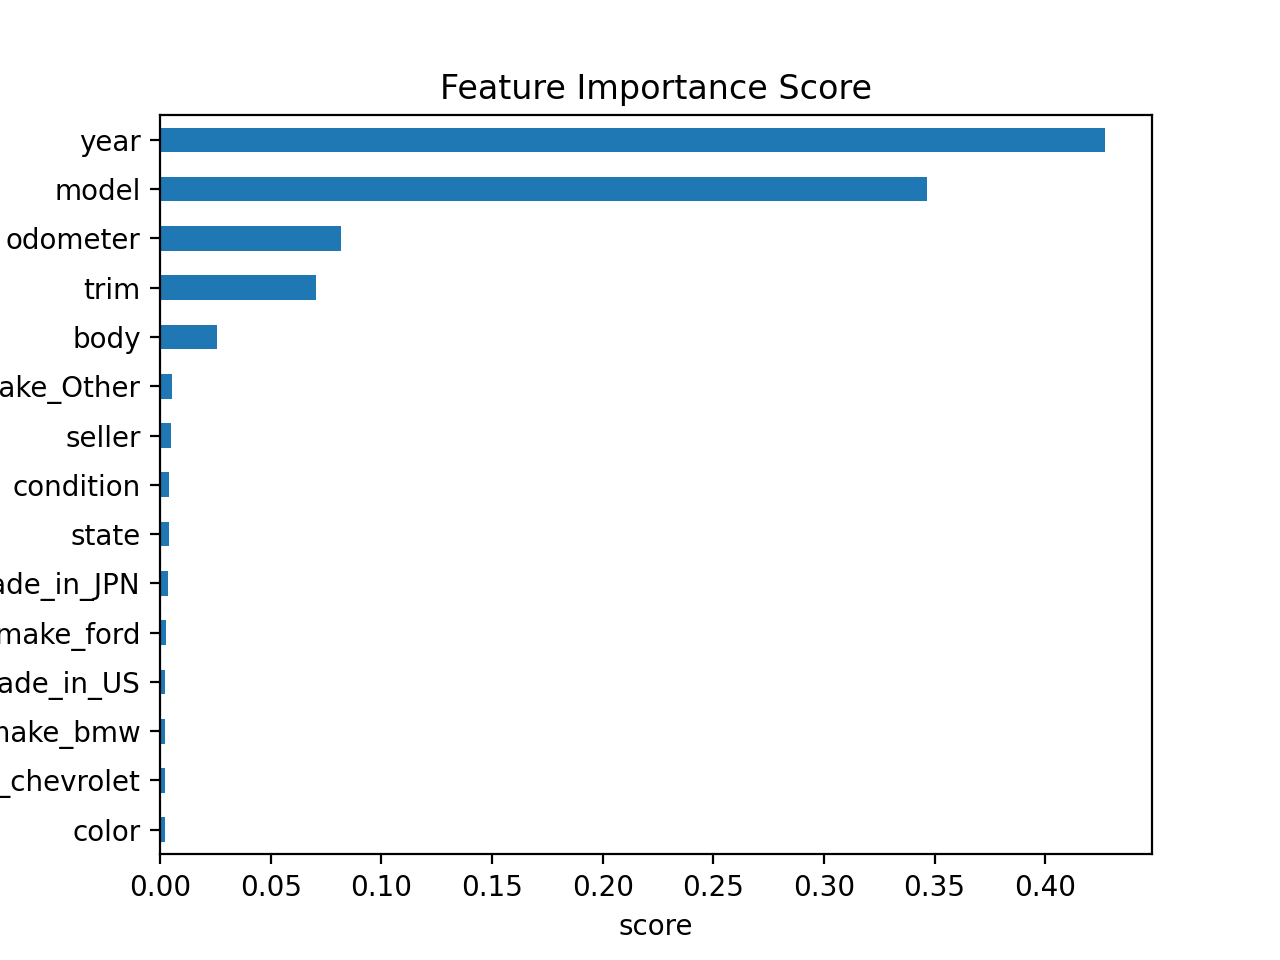

In [94]:
# Menampilkan grafik feature importance
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

### SHAP Value

In [95]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.5 MB/s eta 0:00:00


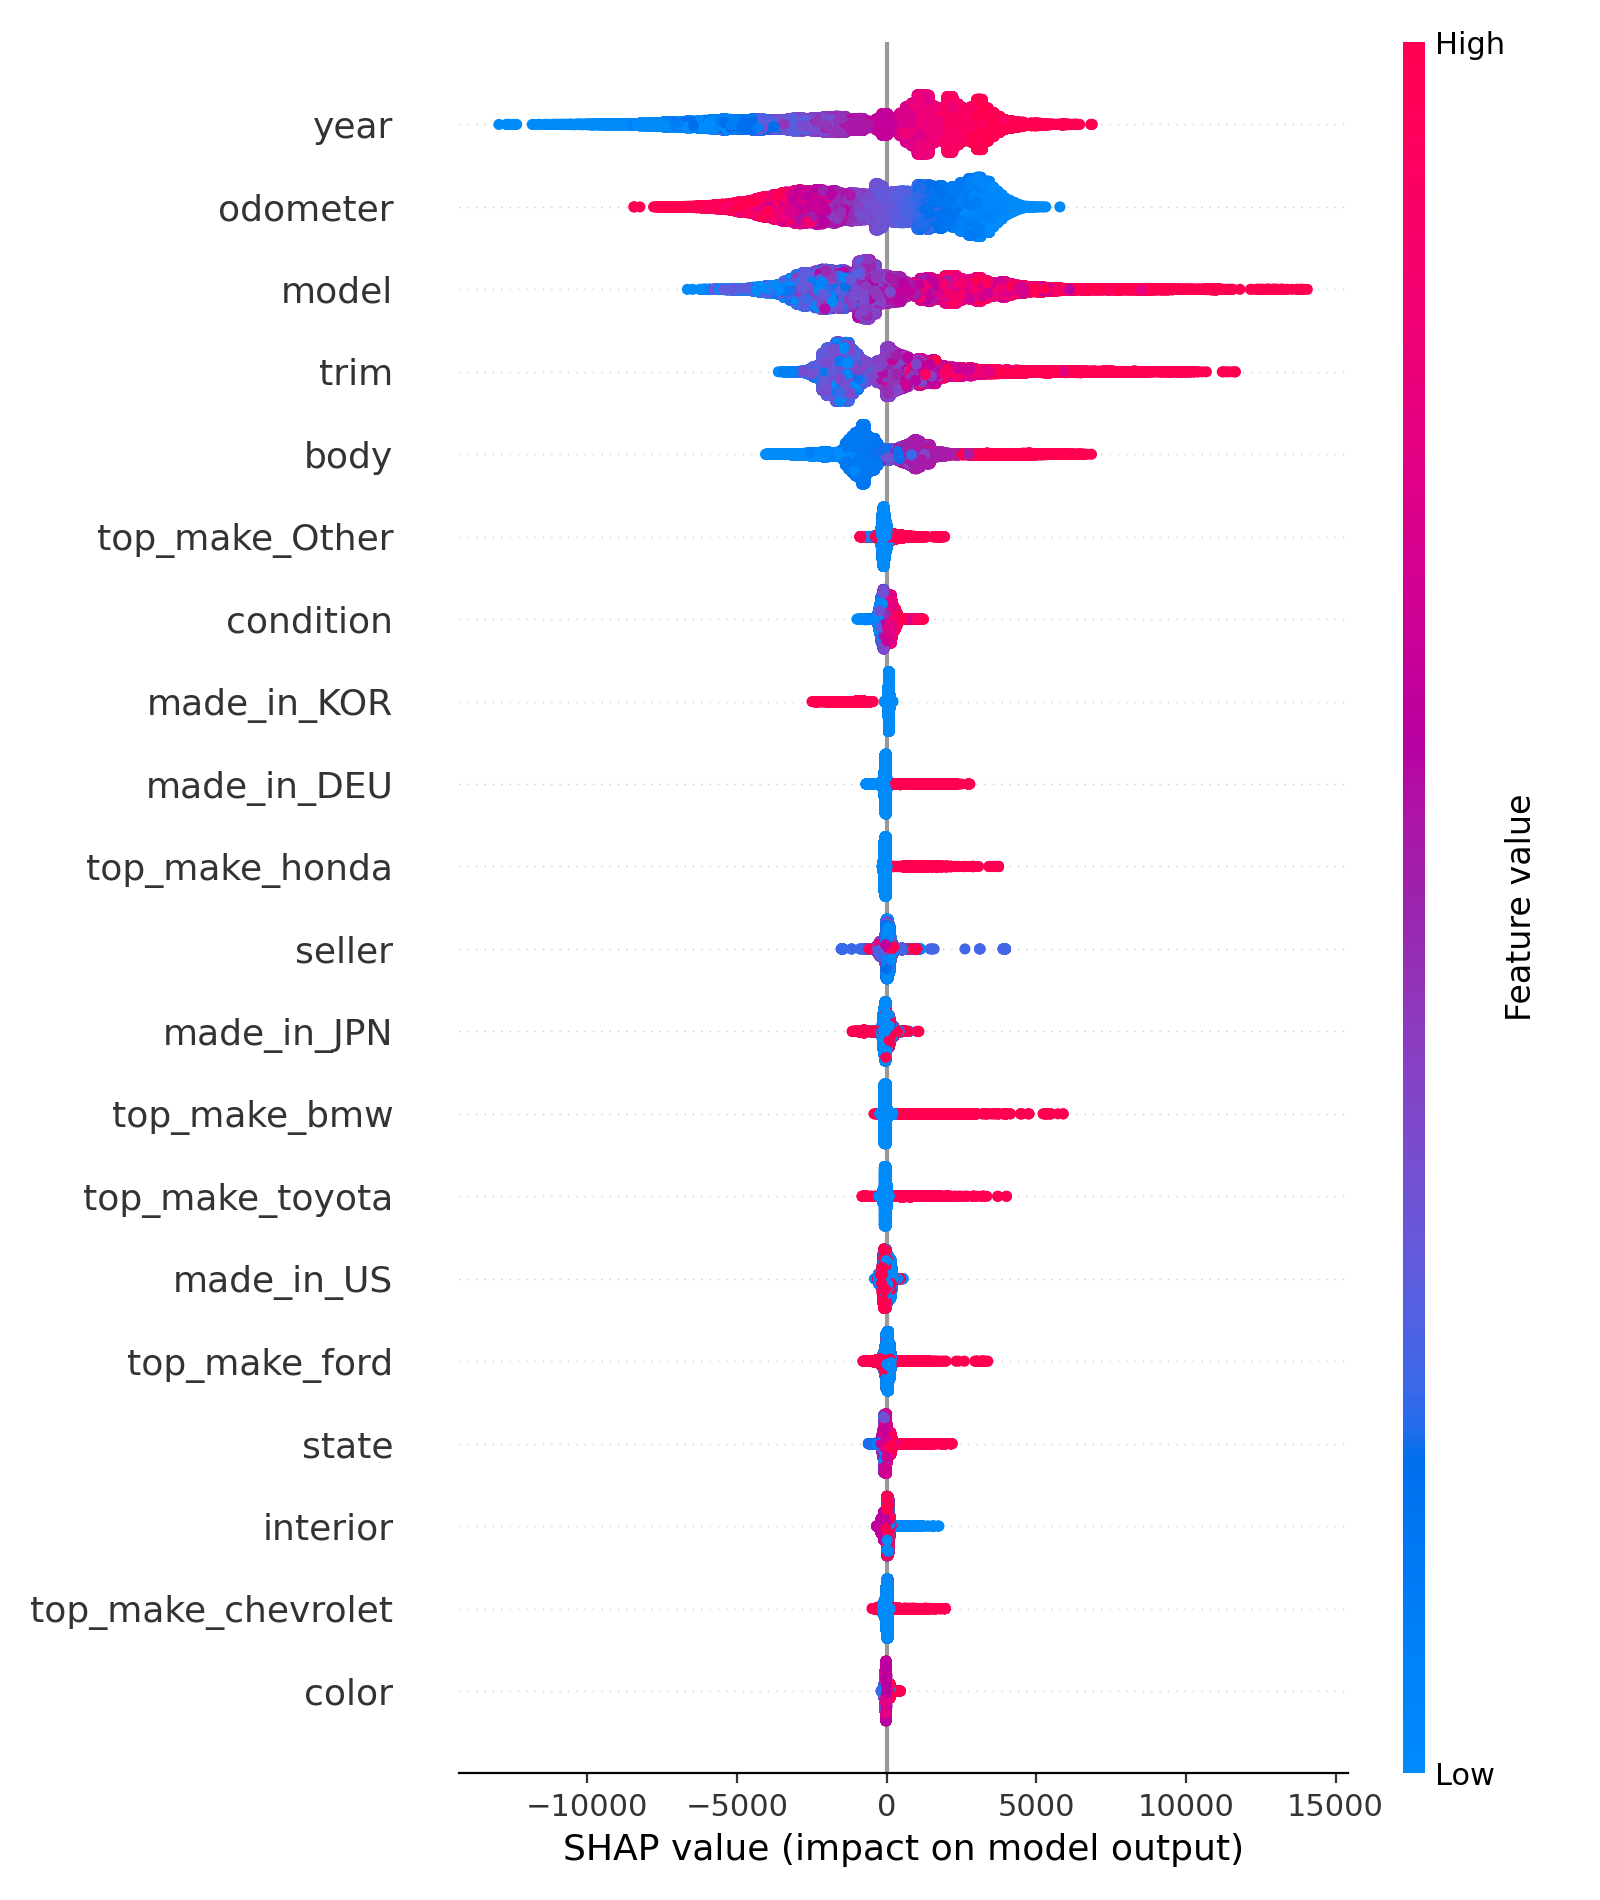

In [96]:
import shap

# Menampilkan summary shap
explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)

### Cross Validation

In [97]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang
SEED = 101
np.random.seed(SEED)

model_cv = RandomForestRegressor(verbose=False)
scores = cross_validate(model_cv, xtrain, ytrain, cv = 5, return_train_score=False)
media = scores['test_score'].mean()
std_dev = scores['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f%%, %.2f%%]" % ((media - 2 * std_dev)*100, (media + 2 * std_dev) * 100))

Accuracy with cross validation, 5 = [97.22%, 97.42%]


### New Selling Price

In [98]:
# Real Price X Predict Price
df_pred = pd.DataFrame(columns=['mmr', 'sellingprice_predicted'])
df_pred['mmr'] = ytest
rf_model = RandomForestRegressor(verbose=False)
rf_model.fit(xtrain, ytrain)
df_pred['sellingprice_predicted'] = rf_model.predict(xtest)
df_pred

,mmr,sellingprice_predicted
262193,8775,8873.500
392466,8100,7615.000
524832,20300,19924.500
286417,2500,2704.000
323786,16050,15889.500
...,...,...
274895,14800,14538.000
382225,14700,18652.500
495101,11600,12163.000
175086,5425,5221.000


**Menambahkan hasil prediksi Selling Price ke Original Dataset**

In [99]:
y_df = pd.DataFrame(data = df_pred, columns = ['sellingprice_predicted'], index = xtest.index.copy())
df_out = pd.merge(dfcar, y_df, how = 'left', left_index = True, right_index = True)
df_out.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_predicted
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),31075.000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.100,14282.000,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.300,2641.000,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [100]:
df_compare = df_out.copy()

# Menghapus selling price predicted yang NaN (data yang tidak digunakan saat modelling)
df_compare.dropna(subset = ['sellingprice_predicted'], inplace=True)

# Membuat kolom baru is below mmr untuk perbandingan
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)
df_compare

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_predicted,is_below_mmr
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),31075.000,1
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.400,14943.000,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),31361.000,1
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.000,28617.000,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),25515.000,1
24,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,3.800,10736.000,black,black,the hertz corporation,67000,65000,Tue Jan 06 2015 12:30:00 GMT-0800 (PST),20610.000,1
26,2015,Volvo,XC70,T6,Wagon,automatic,yv4902nb3f1198103,ca,4.200,16506.000,brown,brown,volvo na rep/world omni,32100,32500,Thu Feb 26 2015 04:30:00 GMT-0800 (PST),15068.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527778,2008,Honda,Civic,EX-L,coupe,automatic,2hgfg12988h532869,fl,2.000,112319.000,gray,tan,onemain rem/minas car group,6675,6200,Fri Jun 19 2015 03:20:00 GMT-0700 (PDT),22193.000,1
527781,2008,Jeep,Wrangler,Unlimited Sahara,suv,NaN,1j4ga59168l648211,fl,3.400,102653.000,silver,gray,autobuy,17250,19000,Thu Jun 11 2015 02:10:00 GMT-0700 (PDT),10014.000,0
527792,2008,Jeep,Liberty,Limited Edition,suv,automatic,1j8gn58kx8w174565,mi,4.100,79975.000,silver,gray,automobiles paille inc,10850,10000,Tue Jun 30 2015 06:30:00 GMT-0700 (PDT),11630.000,1
527804,2008,Jeep,Liberty,Sport,suv,automatic,1j8gp28k88w170782,tx,3.300,54575.000,white,beige,auto mall 59,9275,9600,Thu Jun 18 2015 03:30:00 GMT-0700 (PDT),15804.500,0


Data diatas adalah sama seperti yang digunakan saat pemodelan (105562 baris data) yang sudah ditambahkan selling price hasil prediksi.

**Membuat Perbandingan**

Menggunakan Dataset Asli

In [101]:
# Grouping selling price relatif terhadap MMR sebelum modelling
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

transaction = df_compare.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_below_mmr,,
0,51136,48.440
1,54426,51.560


In [102]:
# Menghitung rata-rata selling price dan kondisi relatif terhadap MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice'])
      else:
        spAboveMMR.append(row['sellingprice'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_compare)

Mean of Selling Price above MMR = 14816.63600985607
Mean of Selling Price below MMR = 12506.370062102671


Menggunakan Hasil Modelling

In [103]:
# Grouping selling price relatif terhadap MMR setelah modelling
df_pred['is_below_mmr'] = df_pred.apply(lambda x: 1 if x.sellingprice_predicted < x.mmr else 0, axis=1)

transaction = df_pred.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_below_mmr,,
0,54688,51.810
1,50874,48.190


In [104]:
# Menghitung rata-rata selling price dan kondisi relatif terhadap MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice_predicted'])
      else:
        spAboveMMR.append(row['sellingprice_predicted'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_pred)

Mean of Selling Price above MMR = 12765.349953371855
Mean of Selling Price below MMR = 13428.801421158156


Dengan sample sebesar 20%, prediksi harga yang dibuat menunjukkan bahwa persentase harga dibawah mmr adalah 48.19% dimana angka ini menunjukkan penurunan sekitar 3% dari data awal dan harga diatas mmr juga 3% mengalami kenaikan dibanding data awal.

# Kesimpulan

Setelah dilakukan pemodelan, rata-rata harga dibawah mmr adalah sebesar 13422. Jika dibandingkan dengan rata-rata harga mobil yang dijual dibawah mmr sebelumnya yaitu 12506, kita bisa menarik kesimpulan bahwa harga mobil direkomendasikan dijual $916 (6.8%) lebih tinggi, sehingga seller bisa mendapatkan keuntungan yang lebih banyak.

Begitu pula dengan rata-rata mobil yang dijual diatas mmr yaitu 12775 jika dibandingkan dengan yang sebelumnya yaitu 14816. Kita bisa merekomendasikan bahwa harga mobil bisa dijual $2041 (13.7%) lebih rendah agar harga tidak terlalu terlampau mahal.